First, let's take a look at the data, and see how we might answer the first question about how to break into the field of becoming a data scientist according to the survey results.

To get started, let's read in the necessary libraries we will need to wrangle our data: pandas and numpy.  If we decided to build some basic plots, matplotlib might prove useful as well.

In [4]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

# Multiple choice dataframe
mc_df = pd.read_csv('./datasets/multiple_choice_responses.csv', low_memory=False)
mc_df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1


As we can see, people of various professional backgrounds answered the Kaggle survey

In [5]:
mc_df.Q5.value_counts()

Data Scientist                                                                                             4085
Student                                                                                                    4014
Software Engineer                                                                                          2705
Other                                                                                                      1690
Data Analyst                                                                                               1598
Research Scientist                                                                                         1470
Not employed                                                                                                942
Business Analyst                                                                                            778
Product/Project Manager                                                                                 

We also can see that there we some people who responded who are not employed or not employed full time, which we can infer from their reported salary

In [6]:
mc_df.Q11.value_counts()

$0 (USD)                                                                                                                             4038
$100-$999                                                                                                                            2335
$1000-$9,999                                                                                                                         2123
$1-$99                                                                                                                               1485
$10,000-$99,999                                                                                                                      1268
> $100,000 ($USD)                                                                                                                    1001
Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?       1
Name: Q11, dtype: int64

Let's narrow it down to just data scientists who are employed

In [7]:
# Only data scientists
ds_df = mc_df[mc_df['Q5'] .isin(['Data Scientist', 'Statistician']) ]
# Only those are are employed and make over $1000/yr
ds_df = ds_df[~ds_df['Q11'].isin(['$0 (USD)', '$1-$99', '$100-$999', ''])] 

ds_df

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
6,470,50-54,Male,-1,France,Master’s degree,Data Scientist,-1,0-49 employees,3-4,...,NaN,NaN,NaN,AWS Relational Database Service,NaN,NaN,NaN,NaN,NaN,-1
12,459,30-34,Male,-1,Germany,Master’s degree,Statistician,-1,0-49 employees,5-9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
13,397,30-34,Male,-1,Germany,Bachelor’s degree,Data Scientist,-1,50-249 employees,5-9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
35,448,22-24,Male,-1,Brazil,Bachelor’s degree,Data Scientist,-1,"> 10,000 employees",1-2,...,NaN,Oracle Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
61,448,35-39,Male,-1,Mexico,Master’s degree,Data Scientist,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19692,290,30-34,Female,-1,India,Master’s degree,Data Scientist,-1,"> 10,000 employees",15-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
19694,111,25-29,Male,-1,India,Master’s degree,Data Scientist,-1,0-49 employees,3-4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
19710,88,25-29,Prefer not to say,-1,Austria,No formal education past high school,Data Scientist,-1,250-999 employees,1-2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
19711,85,22-24,Male,-1,India,Bachelor’s degree,Data Scientist,-1,50-249 employees,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


After seeing the salary values of the cohort, we can see that there are a pecular amount of data scientists who make less than $10,000 which is considered below the poverty line in the United States. This doesn't seem right.

In [8]:
ds_df[ds_df.Q11.notnull()].Q11.value_counts()

$1000-$9,999         818
$10,000-$99,999      519
> $100,000 ($USD)    412
Name: Q11, dtype: int64

Let's check to see if this is dictated by the country of the correspondent 

In [9]:
ds_df[ds_df.Q11 == '$1000-$9,999'].Q3.value_counts()

India                                                   146
United States of America                                116
Brazil                                                   49
Germany                                                  43
Other                                                    34
Spain                                                    29
France                                                   29
United Kingdom of Great Britain and Northern Ireland     28
Japan                                                    26
Italy                                                    19
Australia                                                16
Mexico                                                   14
Nigeria                                                  14
Russia                                                   13
Singapore                                                13
Ukraine                                                  13
China                                   

Most correspondents who answer less than $10,000 are from India. What salary did most Indian correspondence answers and is it similar to the United States*?

<sub>*We are getting finding based on the assumption that our readers are American</sub>

In [7]:
ds_df[ds_df['Q3'] == 'India' ].Q11.value_counts(normalize=True)

$1000-$9,999         0.584
$10,000-$99,999      0.248
> $100,000 ($USD)    0.168
Name: Q11, dtype: float64

In [8]:
ds_df[ds_df['Q3'] == 'United States of America' ].Q11.value_counts(normalize=True)

> $100,000 ($USD)    0.388889
$10,000-$99,999      0.353333
$1000-$9,999         0.257778
Name: Q11, dtype: float64

As we can see, the United States and India are not comparable in their salary distribution. Our audience for this analysis are typically American, therefore, analysis based on salaries in the United States and similar countries might be helpful. 

We can narrow this down by only evaluating data from the top 20 countries who are classified as having "Very high human development" based on the HDI [(more info on HDI can be found here)](https://en.wikipedia.org/wiki/List_of_countries_by_Human_Development_Index#Very_high_human_development).

In [10]:
high_hdi_countries = ['Norway', 'Switzerland', 'Australia', 'Ireland', 'Germany', 'Iceland', 'Hong Kong', 
                      'Sweden', 'Singapore', 'Netherlands', 'Denmark', 'Canada', 'United States of America', 'United Kingdom',
                      'Finland', 'New Zealand', 'Belgium', 'Liechtenstein', 'Japan', 'Austria']

# Only capture top 30 HDI countries
ds_df = ds_df[ds_df['Q3'].isin(high_hdi_countries)]

Now let's see if by only evaluating the top 20 HDI countries, if our dataframe salary looks similar to the United States.

In [10]:
ds_df.Q11.value_counts(normalize=True)

$1000-$9,999         0.349045
$10,000-$99,999      0.335032
> $100,000 ($USD)    0.315924
Name: Q11, dtype: float64

As we can see the salary distribution is now much closer to the United States.

Unfortunately, the survey does not include factors like career satisfaction, job satisfaction, work-life balance, etc, so the only way we can gage success is salary. 

So let's see if degrees affected earning potential. 

In [11]:
ds_df.Q4.value_counts()

Master’s degree                                                      498
Doctoral degree                                                      267
Bachelor’s degree                                                    141
Some college/university study without earning a bachelor’s degree     19
Professional degree                                                   12
I prefer not to answer                                                 6
No formal education past high school                                   2
Name: Q4, dtype: int64

In [22]:
print(ds_df[ds_df.Q4 == 'Bachelor’s degree'].Q11.value_counts(normalize=True))

$1000-$9,999         0.388430
$10,000-$99,999      0.314050
> $100,000 ($USD)    0.297521
Name: Q11, dtype: float64


In [23]:
print(ds_df[ds_df.Q4 == 'Master’s degree'].Q11.value_counts(normalize=True))

$1000-$9,999         0.346988
> $100,000 ($USD)    0.330120
$10,000-$99,999      0.322892
Name: Q11, dtype: float64


In [24]:
print(ds_df[ds_df.Q4 == 'Doctoral degree'].Q11.value_counts(normalize=True))

$10,000-$99,999      0.365741
$1000-$9,999         0.319444
> $100,000 ($USD)    0.314815
Name: Q11, dtype: float64


In [25]:
print(ds_df[ds_df.Q4 == 'Some college/university study without earning a bachelor’s degree'].Q11.value_counts(normalize=True))

$1000-$9,999         0.5000
> $100,000 ($USD)    0.3125
$10,000-$99,999      0.1875
Name: Q11, dtype: float64


In [26]:
print(ds_df[ds_df.Q4 == 'Professional degree'].Q11.value_counts(normalize=True))

$10,000-$99,999      0.6
$1000-$9,999         0.3
> $100,000 ($USD)    0.1
Name: Q11, dtype: float64


In [27]:
print(ds_df[ds_df.Q4 == 'I prefer not to answer'].Q11.value_counts(normalize=True))

$1000-$9,999         0.333333
$10,000-$99,999      0.333333
> $100,000 ($USD)    0.333333
Name: Q11, dtype: float64


In [14]:
# Filter dataframe so that it only includes education and salary fields

filtered_df = ds_df[['Q4', 'Q11']]
mapping = { filtered_df.columns[0]:'Education', filtered_df.columns[1]: 'Salary' }
filtered_df = filtered_df.rename(columns=mapping)

filtered_df

,Education,Salary
12,Master’s degree,"$1000-$9,999"
13,Bachelor’s degree,"$1000-$9,999"
67,Master’s degree,"> $100,000 ($USD)"
105,Master’s degree,"$10,000-$99,999"
110,Doctoral degree,"$1000-$9,999"
...,...,...
19379,Master’s degree,NaN
19383,Master’s degree,NaN
19478,Master’s degree,NaN
19573,Master’s degree,"> $100,000 ($USD)"


['$1000-$9,999' '> $100,000 ($USD)' '$10,000-$99,999']


,Education,Salary
12,Master’s degree,"$1000-$9,999"
13,Bachelor’s degree,"$1000-$9,999"
67,Master’s degree,"> $100,000 ($USD)"
105,Master’s degree,"$10,000-$99,999"
110,Doctoral degree,"$1000-$9,999"
...,...,...
19379,Master’s degree,NaN
19383,Master’s degree,NaN
19478,Master’s degree,NaN
19573,Master’s degree,"> $100,000 ($USD)"


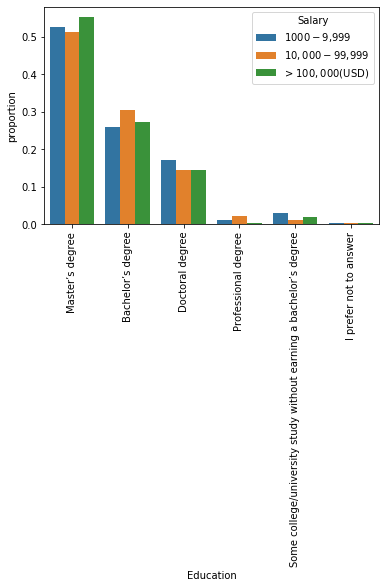

In [28]:
education_levels = filtered_df[filtered_df['Education'].notnull()].Education.unique()
salary_tiers = filtered_df[filtered_df.Salary.notnull()].Salary.unique()

print(salary_tiers)

df = filtered_df
x, y, hue = "Education", "proportion", "Salary"
hue_order = ['$1000-$9,999', '$10,000-$99,999', '> $100,000 ($USD)']

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, hue_order=hue_order).set_xticklabels(rotation=90, labels=list(education_levels)))